## Convolutional Neural Network for Student University Selection Prediction

### Install tensorflow GPU

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 38kB/s 
     |████████████████████████████████| 501kB 18.6MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 4.3MB 18.5MB/s 


### Import Tensorflow Dependencies

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


### Import Python Dipendencies



In [3]:
import numpy as np      # Python Math libs
import pandas as pd     # Python Data libs 
import seaborn as sns   # Python Random Distributions Visualization Libs
import matplotlib.pyplot as plt

### Use sklearn ML Libraries


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

### Mount Drive

In [5]:
# Mount drive to access csv files in colab folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Get Data

In [6]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/InstitutionFinancialData2012_Train_New_InstitutionFinancialData2012_Train_NL.csv')
data.head()

,Satactdt,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,Tuition,TuitionIS,Enroll,Choice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,...,0,1,1,1,1,2,2,0,3,0,0,0,0,0,0,17030,17030,17030,8510,8510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,172,49,0,1740,62,0
1,2,421,44,536,56,480,600,490,470,580,600,22,27,21,28,21,26,6,8,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,...,50,1,1,1,1,2,1,1856,2,0,3830,4820,0,391,39900,39900,39900,39900,31250,31250,39900,0,0,0,0,0,0,0,0,0,0,0,0,0,3732,635,39900,26770,937,0
2,2,883,94,381,40,200,420,210,0,0,410,13,17,8,16,13,16,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,...,0,1,1,1,1,1,1,1324,2,0,7766,2550,0,550,22684,12619,12619,18753,7009,7009,16550,574,574,0,137,137,0,437,437,0,5,77,18,0,2193,1040,16550,2277,897,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,50,1,1,1,1,2,2,0,3,0,0,0,0,0,0,23800,23800,23800,12500,12500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,0,7500,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,...,0,1,1,1,1,2,2,0,3,0,0,0,0,0,0,31504,31504,31504,24304,24304,0,100,100,0,45,45,0,55,55,0,1,32,66,1,85,67,0,19433,8,0


In [7]:
# Drop Slect Columns
X = data.drop(labels=['Choice'], axis = 1)
X.shape

(4299, 98)

In [9]:
Y = data['Choice']

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size= 0.2,random_state=0,stratify=Y)

In [11]:
X_train.shape, X_test.shape

((3439, 98), (860, 98))

#### Feature Selection: 

In [12]:
# Remove any features with varaince less than 1
filter = VarianceThreshold(0.01) 
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((3439, 95), (860, 95))

In [13]:
X_train_T = X_train.T
X_test_T = X_test.T

In [14]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape

(95, 3439)

In [15]:
X_train_T.duplicated().sum()

0

In [16]:
duplicated_features = X_train_T.duplicated()

In [17]:
# Remove andy duplicate features
features_to_keep = [not index for index in duplicated_features]

In [18]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(3439, 95)

In [19]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,2,50,50,1,1,2,2,0,3,0,0,0,0,0,0,32554,32554,32554,21637,21637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,646,0,14850,35
1,2,674,95,164,23,510,620,510,493,620,630,21,28,21,29,20,27,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,1,1,...,181,1,30,30,1,2,2,1,2383,2,0,4640,4120,0,259,41590,42555,42555,42555,33795,33795,41590,249,62,187,64,38,26,185,24,161,1,97,2,0,2746,271,41590,28640,686
2,2,1316,29,4188,92,500,610,520,0,0,630,23,28,22,29,23,28,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,...,130,1,40,40,1,1,1,1,5319,2,0,5494,3178,0,2192,32352,21472,21472,32352,12800,12800,21472,5196,2216,2980,2060,1167,893,3136,1049,2087,1,88,11,0,19508,5029,21472,6142,4532
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,...,0,1,0,0,1,1,1,2,0,3,0,0,0,0,0,0,19956,19956,25524,7956,7956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3063,4849,0,600,1522
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,...,0,1,0,0,1,1,1,2,0,3,0,0,0,0,0,0,14934,18204,18204,8483,11753,0,2396,2396,0,590,590,0,1806,1806,0,10,52,38,1,2631,3729,0,6120,599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,...,0,1,0,0,1,1,1,2,0,3,0,0,0,0,0,0,16955,16955,20905,8055,8055,0,1341,1341,0,717,717,0,624,624,0,22,47,31,0,2241,2073,0,3950,728
3435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,...,0,1,40,0,1,1,2,1,191,1,19,0,0,11800,0,38482,38482,38482,38482,28056,28056,38482,0,0,0,0,0,0,0,0,0,0,0,0,0,1143,578,38482,19987,295
3436,2,2818,83,1196,35,510,620,540,520,630,650,23,28,22,27,24,28,7,9,1,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,...,104,1,70,75,1,1,2,1,8273,1,21,7212,6480,0,1492,55600,55600,55600,55600,41908,41908,55600,4208,532,3676,2458,186,2272,1750,346,1404,2,94,4,0,18803,2226,55600,37610,3065
3437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,...,0,1,25,0,2,2,2,2,0,3,0,0,0,0,0,0,9785,9785,9785,6845,6845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,0,0,6350,111


In [24]:
scalar  = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [25]:
X_train

array([[-9.21360070e-01, -3.20816274e-01, -5.52021142e-01, ...,
        -8.04297497e-01,  1.97767760e-01, -5.74886035e-01],
       [ 7.60910852e-01,  8.23609079e-01,  2.37960972e+00, ...,
         1.55574861e+00,  1.56396047e+00, -2.51366482e-03],
       [ 7.60910852e-01,  1.91369970e+00,  3.42897752e-01, ...,
         4.14142275e-01, -6.64944795e-01,  3.37896734e+00],
       ...,
       [ 7.60910852e-01,  4.46403631e+00,  2.00929845e+00, ...,
         2.35075333e+00,  2.45262970e+00,  2.08915126e+00],
       [-9.21360070e-01, -3.20816274e-01, -5.52021142e-01, ...,
        -8.04297497e-01, -6.44337973e-01, -5.08065298e-01],
       [-9.21360070e-01, -3.20816274e-01, -5.52021142e-01, ...,
        -2.58859574e-01, -1.04557659e+00,  1.59063339e+00]])

In [26]:
X_train.shape, X_test.shape

((3439, 95), (860, 95))

In [27]:
X_train = X_train.reshape(3439,95,1)
X_test  = X_test.reshape(860,95,1)

In [28]:
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

In [29]:
# Hidden Layers
model = Sequential()
# 1D Convolution rectified lin unit: max(0,x)
model.add(Conv1D(32,3,activation='relu',input_shape = (95,1))) 
model.add(BatchNormalization())            # Normalize for optimzation
model.add(MaxPool1D(2))                    # Max Pooling layer - Detect location invariant values
model.add(Dropout(0.3))                    # Dropout to change node structures on convolution passes

model.add(Conv1D(64,3,activation='relu'))  # 1D Convolution
model.add(BatchNormalization())            # Normalize
model.add(MaxPool1D(2))                    # Pool 
model.add(Dropout(0.5))                    # Drop

model.add(Conv1D(128,3,activation='relu')) # 1D Convolution
model.add(BatchNormalization())            # Normalize
model.add(MaxPool1D(2))                    # Pool 
model.add(Dropout(0.5))                    # Drop

# Turn data into 1D Vector
model.add(Flatten())                       

# Create Dense Layers
model.add(Dense(256, activation ='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 93, 32)            128       
_________________________________________________________________
batch_normalization (BatchNo (None, 93, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 46, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 44, 64)            6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 22, 64)            0

In [31]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy']) # Compile w/ Adaptive momentum optimizer and loss func binary cross entropy

In [32]:
history = model.fit(X_train, y_train, epochs =50, validation_data=(X_test, y_test), verbose=1) # Train model over 50 Epochs

Train on 3439 samples, validate on 860 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
3439/3439 [==============================] - 5s 1ms/sample - loss: 0.4661 - accuracy: 0.8723 - val_loss: 1.9479 - val_accuracy: 0.0442
Epoch 2/50
3439/3439 [==============================] - 3s 871us/sample - loss: 0.3445 - accuracy: 0.9285 - val_loss: 1.9493 - val_accuracy: 0.0442
Epoch 3/50
3439/3439 [==============================] - 3s 889us/sample - loss: 0.3223 - accuracy: 0.9340 - val_loss: 1.3417 - val_accuracy: 0.0942
Epoch 4/50
3439/3439 [==============================] - 3s 891us/sample - loss: 0.2957 - accuracy: 0.9395 - val_loss: 0.8015 - val_accuracy: 0.4709
Epoch 5/50
3439/3439 [==============================] - 3s 868us/sample - loss: 0.2912 - accuracy: 0.9386 - val_loss: 0.5369 - val_accuracy: 0.7558
Epoch 6/50
3439/3439 [==============================] - 3s 884us/sample - loss: 0.3024 - accuracy: 0.9372 - val_loss: 0.4

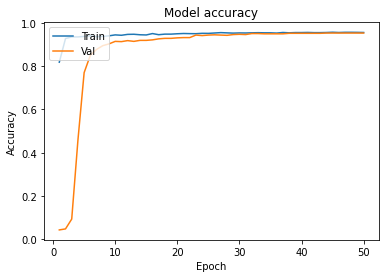

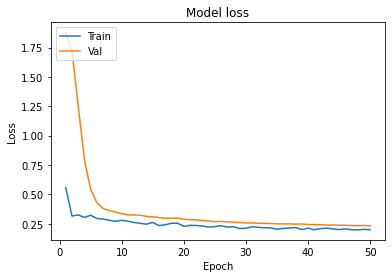

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 50)